In [2]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Available columns: ['Employee ID', 'Survey Date', 'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score', 'Training Date', 'Training Program Name', 'Training Type', 'Training Outcome', 'Location', 'Trainer', 'Training Duration(Days)', 'Training Cost', 'Applicant ID', 'Application Date', 'First Name', 'Last Name', 'Gender', 'Date of Birth', 'Phone Number', 'Email', 'Address', 'City', 'State', 'Zip Code', 'Country', 'Education Level', 'Years of Experience', 'Desired Salary', 'Job Title', 'Status']

Correlation Matrix:
                         EmpID  Engagement Score  Satisfaction Score  \
EmpID                     1.00              0.02                0.02   
Engagement Score          0.02              1.00               -0.03   
Satisfaction Score        0.02             -0.03                1.00   
Work-Life Balance Score  -0.04              0.10               -0.03   
Training Cost            -0.07              0.02                0.03   

                         Work-Li

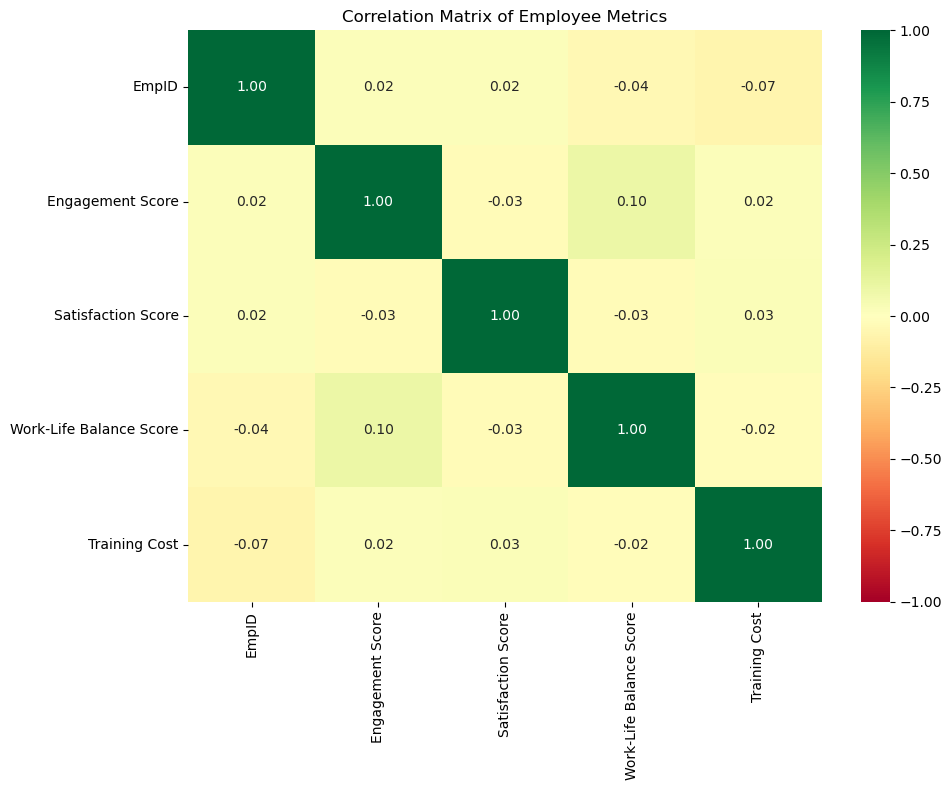


Correlation matrix saved to 'correlation_matrix.csv'
Heatmap saved to 'correlation_heatmap.png'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
try:
    recruitment_data = pd.read_excel('Data Analyst Assignment (1).xlsx', sheet_name='Recruitment Data')
    engagement_data = pd.read_excel('Data Analyst Assignment (1).xlsx', sheet_name='Employee Engagement Survey Data')
    training_data = pd.read_excel('Data Analyst Assignment (1).xlsx', sheet_name='training_and_development_data')
except FileNotFoundError:
    print("Error: 'Data Analyst Assignment (1).xlsx' not found. Please check the file path.")
    exit()
recruitment_offered = recruitment_data[recruitment_data['Status'] == 'Offered']
location_mapping = {
    'Region A': 1,  
    'Region B': 2,
}
recruitment_offered = recruitment_offered.copy()  
recruitment_offered['Country'] = recruitment_offered['Country'].map(location_mapping).fillna(0)

merged_data = pd.merge(
    engagement_data,
    training_data,
    left_on='Employee ID',
    right_on='Employee ID',
    how='inner'
)

correlation_data = pd.merge(
    merged_data,
    recruitment_offered,
    left_on='Employee ID',
    right_on='Applicant ID',
    how='inner'
)

correlation_columns = [
    'Employee ID',  
    'LocationCode',
    'Current Employee Rating',
    'Engagement Score',
    'Satisfaction Score',
    'Work-Life Balance Score',
    'Training Duration (Days)',
    'Training Cost'
]

available_columns = [col for col in correlation_columns if col in correlation_data.columns]
if len(available_columns) < len(correlation_columns):
    missing = set(correlation_columns) - set(available_columns)
    print(f"Warning: Missing columns: {missing}")
    print("Available columns:", correlation_data.columns.tolist())

correlation_data = correlation_data[available_columns]
correlation_data = correlation_data.rename(columns={'Employee ID': 'EmpID'})
correlation_data = correlation_data.dropna()
correlation_matrix = correlation_data.corr(method='pearson')
correlation_matrix = correlation_matrix.round(2)
print("\nCorrelation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap='RdYlGn',  
    center=0, 
    vmin=-1, vmax=1, 
    fmt='.2f' 
)
plt.title('Correlation Matrix of Employee Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
correlation_matrix.to_csv('correlation_matrix.csv')
print("\nCorrelation matrix saved to 'correlation_matrix.csv'")
print("Heatmap saved to 'correlation_heatmap.png'")